# 1. Import Necessary Libraries

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import logging
import matplotlib.pyplot as plt
import gc
import numpy as np

RELATIVE_FEATURES_DIR = '../data/features'  # Relative path to the features directory
REMOVE_KIDS = True                          # Remove kids from the dataset
SEPARATE_KIDS_PLOTS = False                 # Separate kids from the dataset
LANGUAGES = [                               # Languages to consider
    'es',
    'hi',
    'ar',
    'ja'
]

# 2. Tests

In [2]:
# Initialize an empty list to collect data for each language
summary_data = []

# Loop through each language
for language in LANGUAGES:
    # Check if the file exists
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    
    if not file_path.exists():
        print(f"File {language}_features.csv does not exist. Please run the feature extraction script first.")
        continue

    # Load the CSV file into a DataFrame
    df_features = pd.read_csv(file_path)

    # Collect relevant information
    num_rows = len(df_features)

    # Gender distribution based on prefixes
    male_count = df_features['gender'].str.startswith('male').sum()
    female_count = df_features['gender'].str.startswith('female').sum()

    # Age classification: count 'teens' (13-19) or 'adults' (20+)
    df_features['age_group'] = df_features['age'].apply(
        lambda x: 'teens' if 'teens' in str(x).lower() else 'adults'
    )

    # Count teens and adults
    age_group_counts = df_features['age_group'].value_counts().to_dict()
    teens_count = age_group_counts.get('teens', 0)
    adults_count = age_group_counts.get('adults', 0)

    # Add the summary information to the list
    summary_data.append([
        language, num_rows, male_count, female_count, teens_count, adults_count
    ])

# Define the column names
columns = ['Language', 'Num_Rows', 'Gender_male', 'Gender_female', 'Teens', 'Adults']

# Create the DataFrame with specified columns
summary_df = pd.DataFrame(summary_data, columns=columns)

# Display the summary DataFrame
print(summary_df)


  Language  Num_Rows  Gender_male  Gender_female  Teens  Adults
0       es    214698       156439          57130   8634  206064
1       hi      7484         7053            431    129    7355
2       ar     32739        18283          14456   3049   29690
3       ja     72399        41164          31235   4409   67990


# 3. EXploration steps

## 3.1 Pitch

### 3.1.1 Pitch per language

#### 3.1.1.1 Histograms

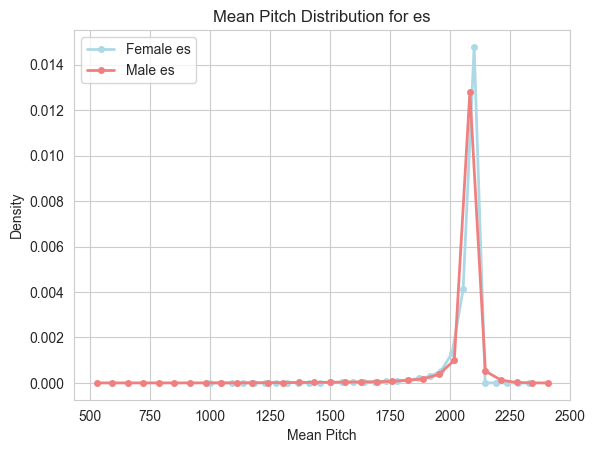

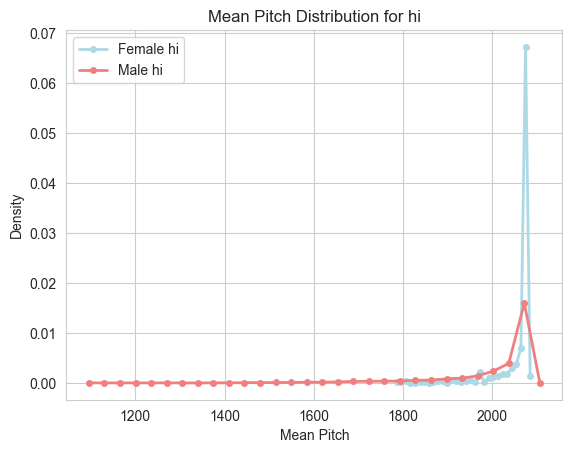

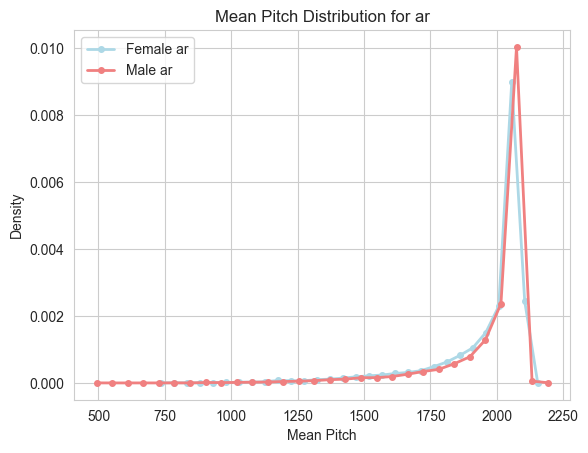

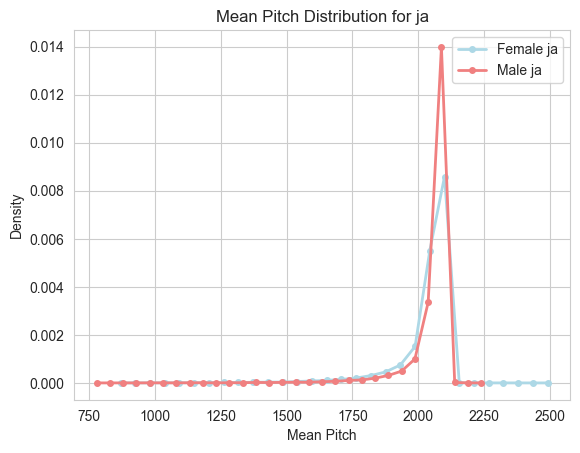

In [3]:
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Filter females and males from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set seaborn style
    sns.set_style('whitegrid')

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create a histogram for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['pitch_mean'], bins=bins, density=True)
    
    # Create a histogram for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['pitch_mean'], bins=bins, density=True)

    # Calculate the bin centers for plotting
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for females and males
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', color='lightblue', linewidth=2, marker='o', markersize=4)
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', color='lightcoral', linewidth=2, marker='o', markersize=4)

    # Set the title and legend
    plt.title(f'Mean Pitch Distribution for {language}')
    plt.xlabel('Mean Pitch')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

#### 3.1.1.2 Box plots

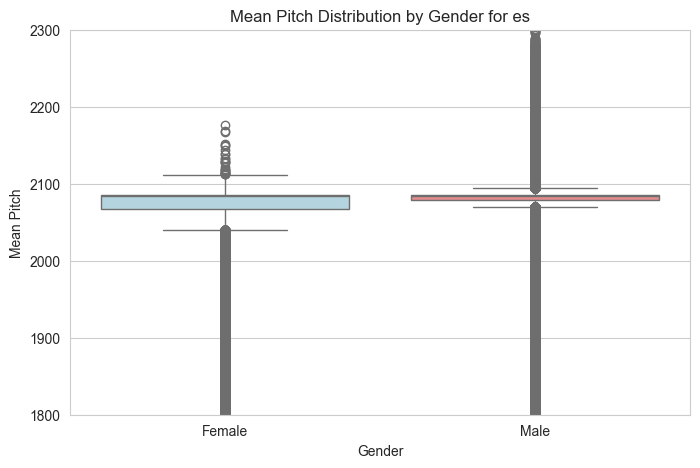

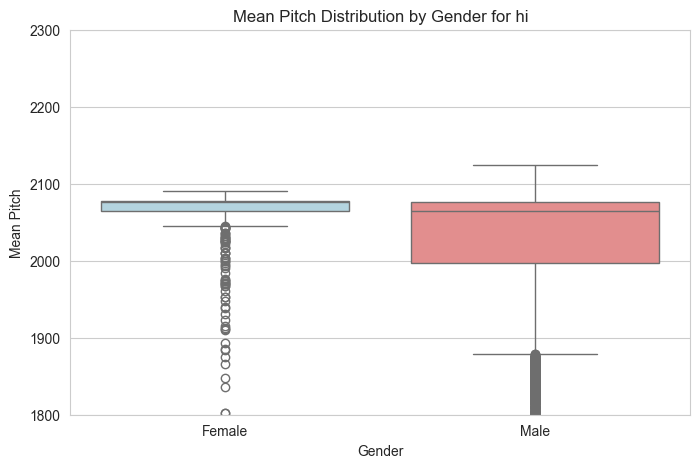

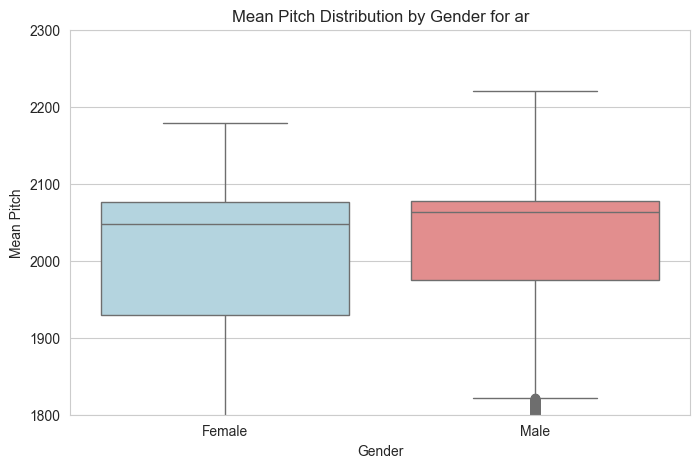

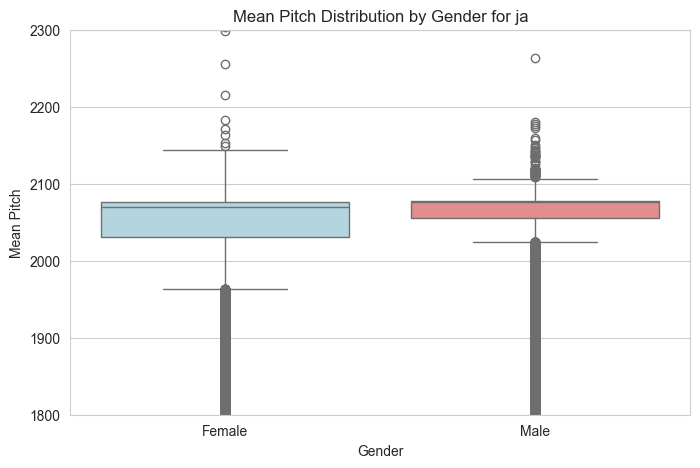

In [4]:
# Set seaborn style for all plots
sns.set_style('whitegrid')

# Loop through each language
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')


    # Filter data for females and males
    df_female = df_features[df_features['gender'].str.startswith('female')]
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Create a new DataFrame specifically for the boxplot
    df_gender_pitch = pd.DataFrame({
        'Pitch Mean': pd.concat([df_female['pitch_mean'], df_male['pitch_mean']], ignore_index=True),
        'Gender': ['Female'] * len(df_female) + ['Male'] * len(df_male)
    })

    # Plot the boxplot for pitch mean by gender
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Gender', y='Pitch Mean', data=df_gender_pitch, hue='Gender', dodge=False, 
                palette={'Female': 'lightblue', 'Male': 'lightcoral'}, legend=False)
    
    # Some mambo jambo
    plt.ylim(1800, 2300)

    # Set title and labels
    plt.title(f'Mean Pitch Distribution by Gender for {language}')
    plt.xlabel('Gender')
    plt.ylabel('Mean Pitch')

    # Show the plot
    plt.show()


### 3.1.2 Pitch across all languages

#### 3.1.2.1 Histograms

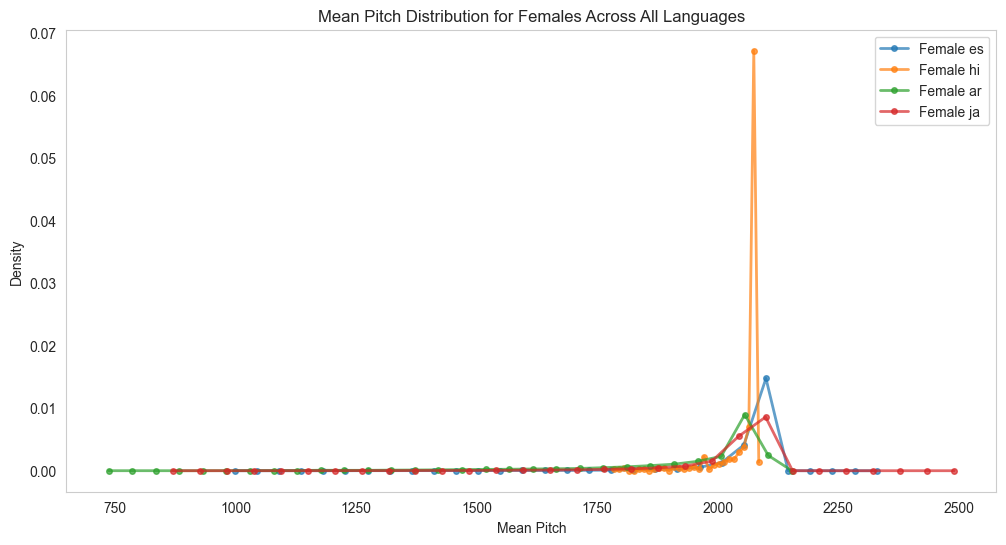

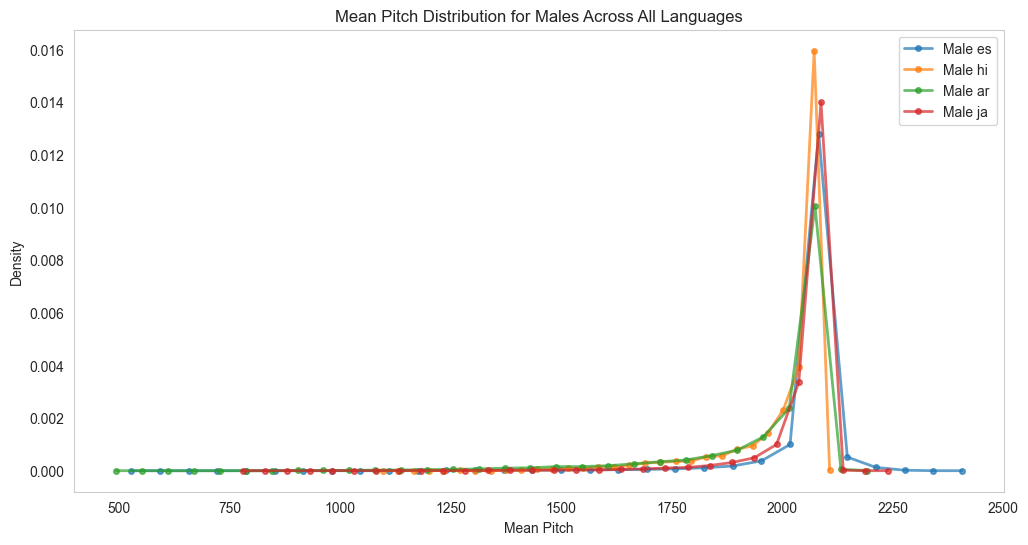

In [5]:
# Set up the figure for females
plt.figure(figsize=(12, 6))
plt.title('Mean Pitch Distribution for Females Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Filter females from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['pitch_mean'], bins=bins, density=True)
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])

    # Plot the lines for females
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize female plot
plt.legend()
plt.grid()
plt.show()

# Set up the figure for males
plt.figure(figsize=(12, 6))
plt.title('Mean Pitch Distribution for Males Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

# Loop again for males
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Filter males from df_features based on gender prefix
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['pitch_mean'], bins=bins, density=True)
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for males
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize male plot
plt.legend()
plt.grid()
plt.show()

#### 3.1.2.1 Heatmaps

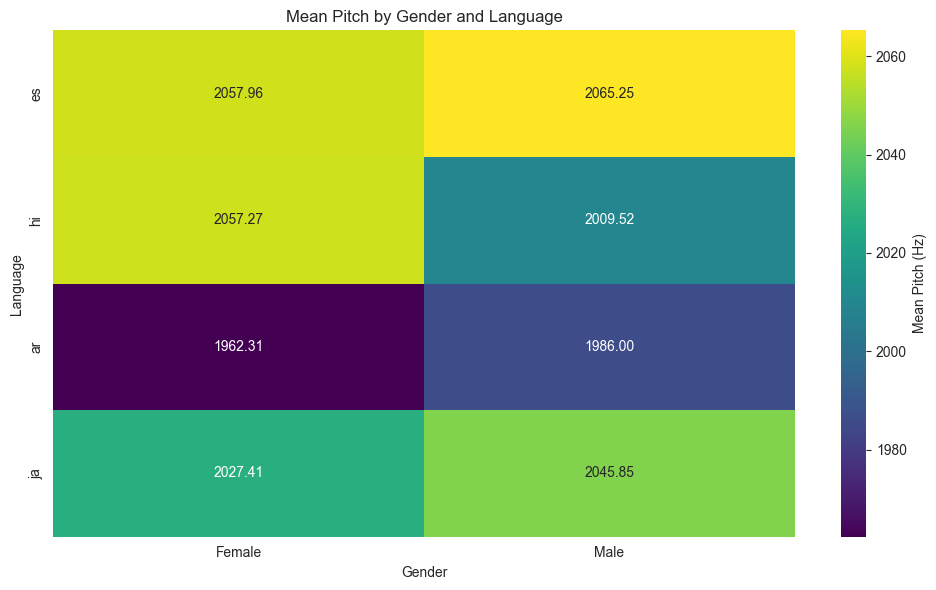

In [6]:
# Initialize an empty DataFrame to store the pitch means
pitch_means = pd.DataFrame(columns=['Female', 'Male'])

# Loop through each language
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)
    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Calculate the mean of pitch_mean for each gender
    female_pitch_mean = df_features[df_features['gender'].str.startswith('female')]['pitch_mean'].mean()
    male_pitch_mean = df_features[df_features['gender'].str.startswith('male')]['pitch_mean'].mean()

    # Add the results to the DataFrame
    pitch_means.loc[language] = [female_pitch_mean, male_pitch_mean]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pitch_means, annot=True, cmap='viridis', cbar_kws={'label': 'Mean Pitch (Hz)'}, fmt=".2f")

# Set title and labels
plt.title('Mean Pitch by Gender and Language')
plt.xlabel('Gender')
plt.ylabel('Language')

# Show the plot
plt.tight_layout()
plt.show()


### 3.1.3 Pitch mean statistics

<Figure size 800x500 with 0 Axes>

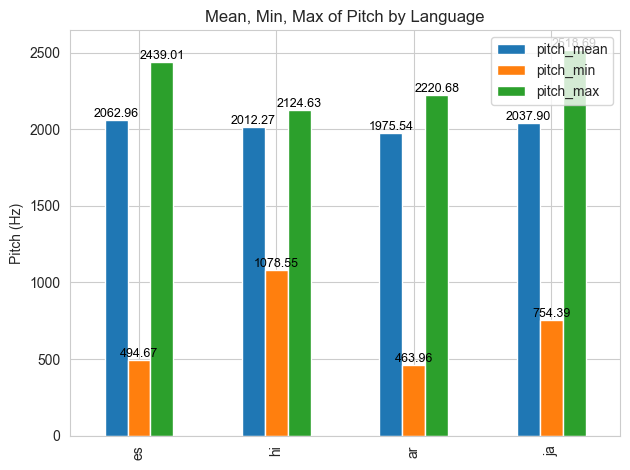

In [7]:
# Create a new DataFrame to store summary statistics
summary_stats = pd.DataFrame()

# Loop through each language
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)
    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Calculate summary statistics for pitch
    pitch_mean = df_features['pitch_mean'].mean()
    pitch_min = df_features['pitch_mean'].min()
    pitch_max = df_features['pitch_mean'].max()

    # Add the summary statistics to the DataFrame
    summary_stats.loc[language, 'pitch_mean'] = pitch_mean
    summary_stats.loc[language, 'pitch_min'] = pitch_min
    summary_stats.loc[language, 'pitch_max'] = pitch_max

# Calculate summary statistics for pitch
pitch_stats = summary_stats[[f"pitch_mean", "pitch_min", "pitch_max"]]

# Plot pitch statistics
plt.figure(figsize=(8, 5))
ax = pitch_stats.plot(kind='bar')

# Customize the plot
ax.set_title("Mean, Min, Max of Pitch by Language")
ax.set_ylabel("Pitch (Hz)")
ax.legend(loc='upper right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()


## 3.2 Spectral Centroid

### 3.2.1 Spectral Centroid per language

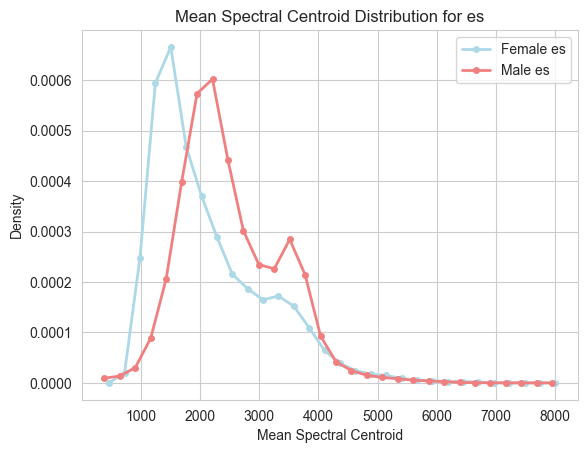

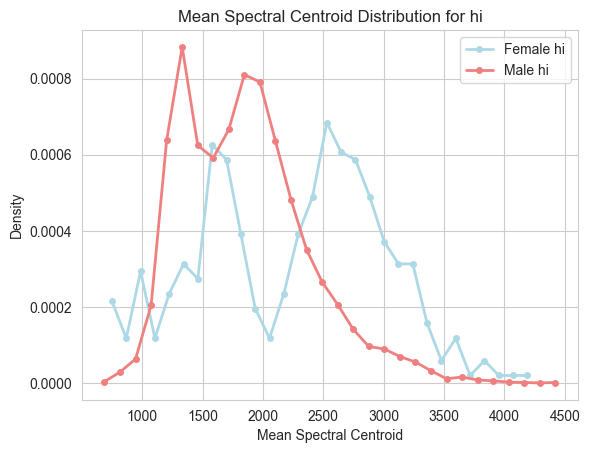

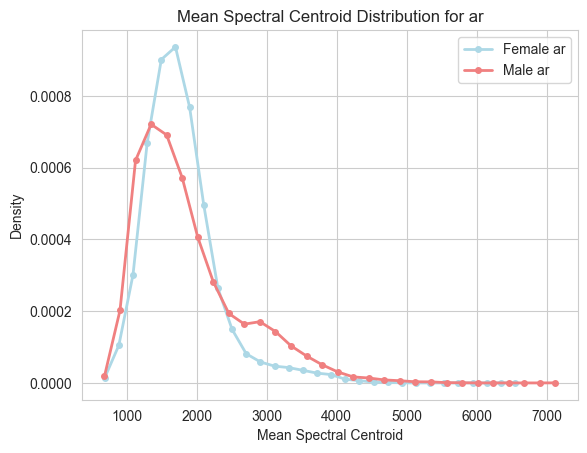

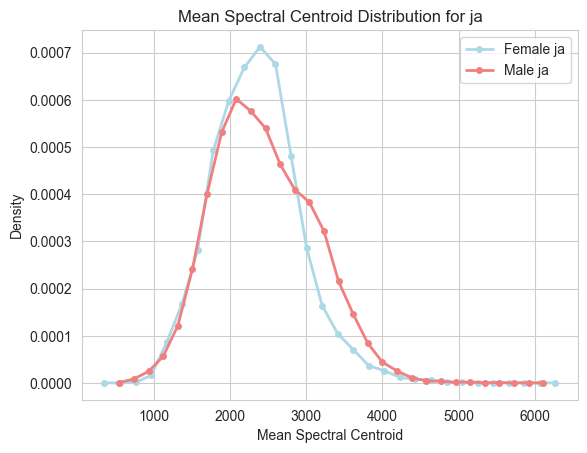

In [8]:
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)
    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Filter females and males from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set seaborn style
    sns.set_style('whitegrid')

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create a histogram for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['spectral_centroid_mean'], bins=bins, density=True)
    
    # Create a histogram for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['spectral_centroid_mean'], bins=bins, density=True)

    # Calculate the bin centers for plotting
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for females and males
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', color='lightblue', linewidth=2, marker='o', markersize=4)
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', color='lightcoral', linewidth=2, marker='o', markersize=4)

    # Set the title and legend
    plt.title(f'Mean Spectral Centroid Distribution for {language}')
    plt.xlabel('Mean Spectral Centroid')
    plt.ylabel('Density')
    plt.legend()

    # Show the plot
    plt.show()

### 3.2.2 Spectral Centroid Across All Languages

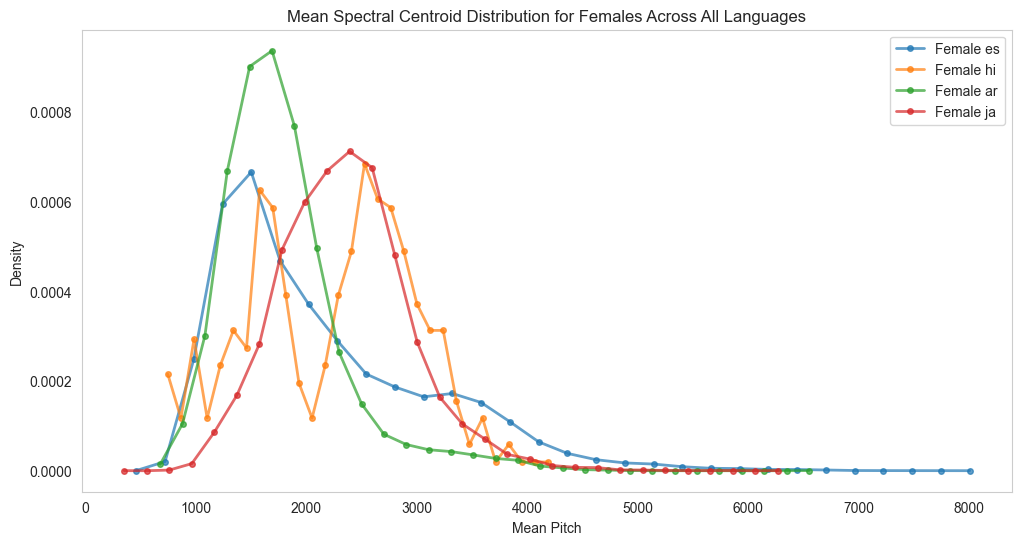

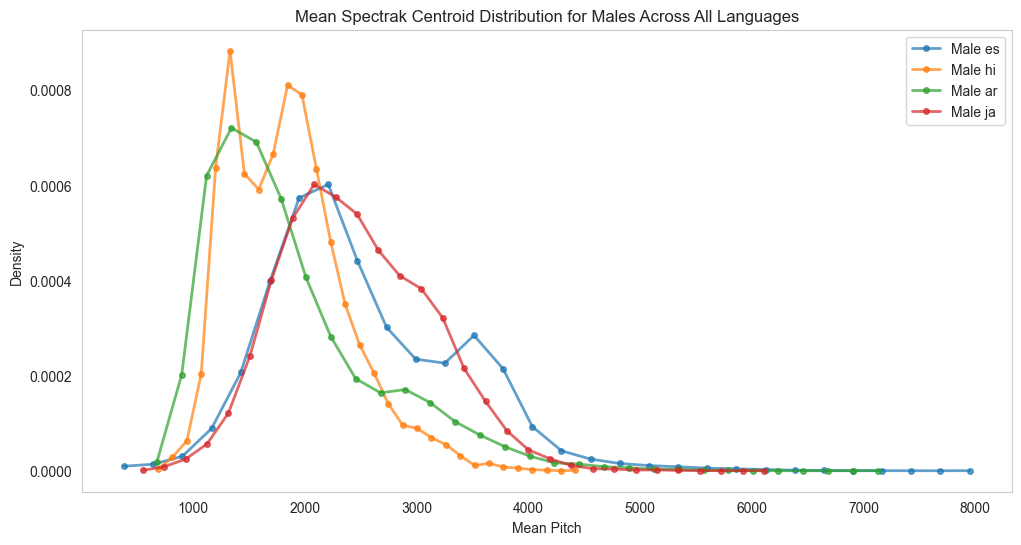

In [9]:
# Set up the figure for females
plt.figure(figsize=(12, 6))
plt.title('Mean Spectral Centroid Distribution for Females Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Filter females from df_features based on gender prefix
    df_female = df_features[df_features['gender'].str.startswith('female')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for females (get the counts and bin edges)
    female_counts, female_bins = np.histogram(df_female['spectral_centroid_mean'], bins=bins, density=True)
    female_bin_centers = 0.5 * (female_bins[1:] + female_bins[:-1])

    # Plot the lines for females
    plt.plot(female_bin_centers, female_counts, label=f'Female {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize female plot
plt.legend()
plt.grid()
plt.show()

# Set up the figure for males
plt.figure(figsize=(12, 6))
plt.title('Mean Spectrak Centroid Distribution for Males Across All Languages')
plt.xlabel('Mean Pitch')
plt.ylabel('Density')
sns.set_style('whitegrid')

# Loop again for males
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Filter males from df_features based on gender prefix
    df_male = df_features[df_features['gender'].str.startswith('male')]

    # Set the number of bins for the histogram
    bins = 30  # You can adjust this number based on your data

    # Create histograms for males (get the counts and bin edges)
    male_counts, male_bins = np.histogram(df_male['spectral_centroid_mean'], bins=bins, density=True)
    male_bin_centers = 0.5 * (male_bins[1:] + male_bins[:-1])

    # Plot the lines for males
    plt.plot(male_bin_centers, male_counts, label=f'Male {language}', linewidth=2, marker='o', alpha=0.7, markersize=4)

# Finalize male plot
plt.legend()
plt.grid()
plt.show()

### 3.2.3 Spectral Centroid Mean Statistics

<Figure size 800x500 with 0 Axes>

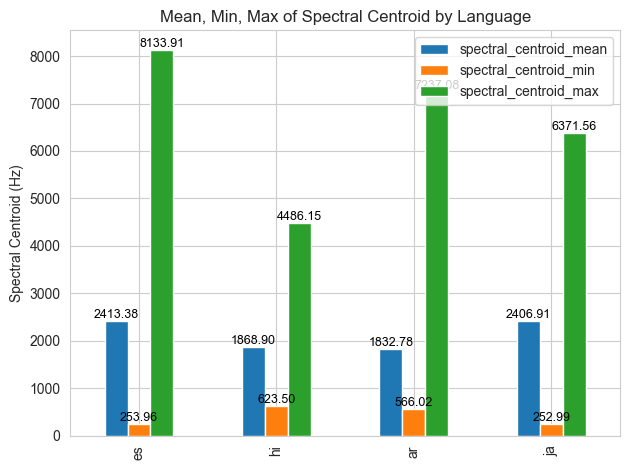

In [10]:
# Create a new DataFrame to store summary statistics if it doesn't exist
if 'summary_stats' not in locals():
    summary_stats = pd.DataFrame()

# Loop through each language
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)
    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Calculate summary statistics for spectral centroid
    spectral_centroid_mean = df_features['spectral_centroid_mean'].mean()
    spectral_centroid_min = df_features['spectral_centroid_mean'].min()
    spectral_centroid_max = df_features['spectral_centroid_mean'].max()

    # Add the summary statistics to the DataFrame
    summary_stats.loc[language, 'spectral_centroid_mean'] = spectral_centroid_mean
    summary_stats.loc[language, 'spectral_centroid_min'] = spectral_centroid_min
    summary_stats.loc[language, 'spectral_centroid_max'] = spectral_centroid_max

# Calculate summary statistics for spectral centroid
spectral_centroid_stats = summary_stats[[f"spectral_centroid_mean", "spectral_centroid_min", "spectral_centroid_max"]]

# Plot spectral centroid statistics
plt.figure(figsize=(8, 5))
ax = spectral_centroid_stats.plot(kind='bar')

# Customize the plot
ax.set_title("Mean, Min, Max of Spectral Centroid by Language")
ax.set_ylabel("Spectral Centroid (Hz)")
ax.legend(loc='upper right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()


## 3.3 Spectral Bandwith

<Figure size 800x500 with 0 Axes>

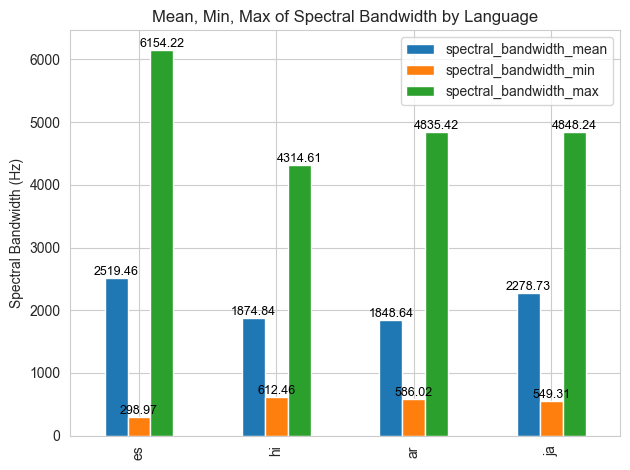

In [11]:
# Create a new DataFrame to store summary statistics if it doesn't exist
if 'summary_stats' not in locals():
    summary_stats = pd.DataFrame()

# Loop through each language
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)
    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')

    # Calculate summary statistics for spectral bandwidth
    spectral_bandwidth_mean = df_features['spectral_bandwidth_mean'].mean()
    spectral_bandwidth_min = df_features['spectral_bandwidth_mean'].min()
    spectral_bandwidth_max = df_features['spectral_bandwidth_mean'].max()

    # Add the summary statistics to the DataFrame
    summary_stats.loc[language, 'spectral_bandwidth_mean'] = spectral_bandwidth_mean
    summary_stats.loc[language, 'spectral_bandwidth_min'] = spectral_bandwidth_min
    summary_stats.loc[language, 'spectral_bandwidth_max'] = spectral_bandwidth_max

# Calculate summary statistics for spectral bandwidth
spectral_bandwidth_stats = summary_stats[['spectral_bandwidth_mean', 'spectral_bandwidth_min', 'spectral_bandwidth_max']]

# Plot spectral bandwidth statistics
plt.figure(figsize=(8, 5))
ax = spectral_bandwidth_stats.plot(kind='bar')

# Customize the plot
ax.set_title("Mean, Min, Max of Spectral Bandwidth by Language")
ax.set_ylabel("Spectral Bandwidth (Hz)")
ax.legend(loc='upper right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()


## 3.4 MFCC

### 3.4.1.1 Mean, Min, Max statistics across languages

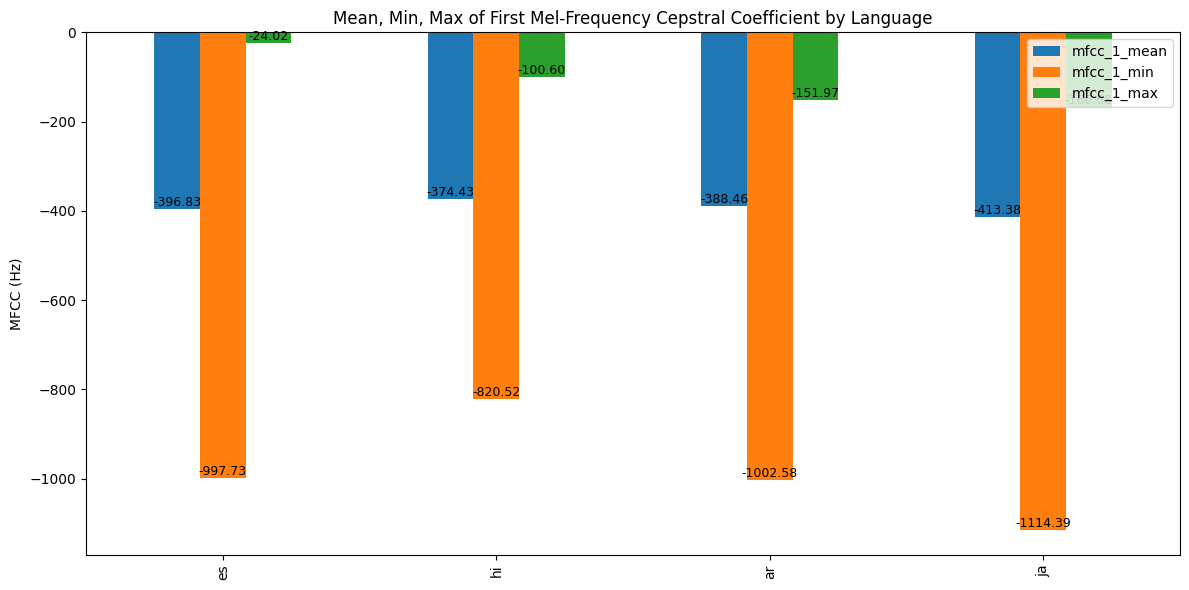

In [2]:
# Create a new DataFrame to store summary statistics if it doesn't exist
if 'summary_stats' not in locals():
    summary_stats = pd.DataFrame()

# Loop through each language
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)
    
    # if REMOVE_KIDS is True, remove Teens from the dataset
    if REMOVE_KIDS:
        rows = len(df_features)
        df_features = df_features[~df_features['age'].str.contains('teens', case=False)]
        print(f'Removed {rows - len(df_features)} teens from the dataset for {language}')
    
    # Convert the MFCC string arrays to numerical arrays
    df_features['mfcc_mean'] = df_features['mfcc_mean'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
    
    # Calculate mean, min, and max for each MFCC coefficient
    mfcc_means = np.mean(np.stack(df_features['mfcc_mean'].values), axis=0)
    mfcc_mins = np.min(np.stack(df_features['mfcc_mean'].values), axis=0)
    mfcc_maxs = np.max(np.stack(df_features['mfcc_mean'].values), axis=0)
    
    # Store the results in the summary statistics DataFrame
    for i, (mean, min_val, max_val) in enumerate(zip(mfcc_means, mfcc_mins, mfcc_maxs), start=1):
        summary_stats.loc[language, f'mfcc_{i}_mean'] = mean
        summary_stats.loc[language, f'mfcc_{i}_min'] = min_val
        summary_stats.loc[language, f'mfcc_{i}_max'] = max_val

# Calculate summary statistics for MFCCs
mfcc_stats = summary_stats.filter(regex='mfcc_.*_(mean|min|max)')

# Plot MFCC statistics for the first MFCC as an example
plt.figure(figsize=(12, 6))
ax = mfcc_stats.filter(regex='mfcc_1_').plot(kind='bar', ax=plt.gca())

# Customize the plot
ax.set_title("Mean, Min, Max of First Mel-Frequency Cepstral Coefficient by Language")
ax.set_ylabel("MFCC (Hz)")
ax.legend(loc='upper right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()


 ### 3.4.1.2 MFCC - specific coefficients across languages

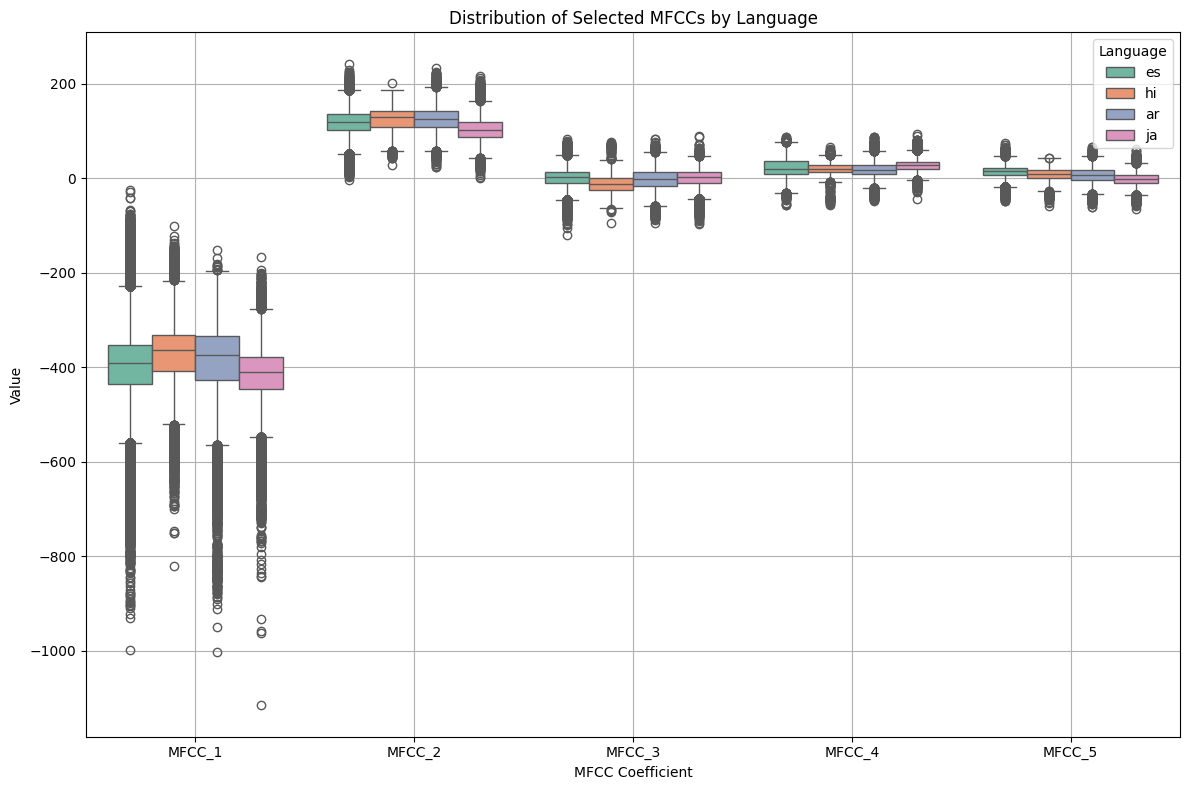

In [5]:
# List of selected MFCC coefficients to plot
selected_mfccs = [1, 2, 3, 4, 5]  # Adjust this list to include the coefficients you're interested in

# Create a DataFrame to store MFCC values with language labels
mfcc_df = pd.DataFrame()

# Loop through each language and collect MFCC values
for language in LANGUAGES:
    # Load the CSV file into a DataFrame
    file_path = Path(f'{RELATIVE_FEATURES_DIR}/{language}_features.csv')
    df_features = pd.read_csv(file_path)

    # Convert the MFCC string arrays to numerical arrays
    df_features['mfcc_mean'] = df_features['mfcc_mean'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))

    # Collect MFCC values for the selected coefficients
    for mfcc in selected_mfccs:
        mfcc_values = df_features['mfcc_mean'].apply(lambda x: x[mfcc - 1] if len(x) >= mfcc else np.nan).tolist()
        # mfcc_df = mfcc_df.append(pd.DataFrame({'Language': language, 'MFCC': f'MFCC_{mfcc}', 'Value': mfcc_values}), ignore_index=True)
        mfcc_df = pd.concat([mfcc_df, pd.DataFrame({'Language': language, 'MFCC': f'MFCC_{mfcc}', 'Value': mfcc_values})], ignore_index=True)

# Plotting the selected MFCCs for each language
plt.figure(figsize=(12, 8))
sns.boxplot(x='MFCC', y='Value', hue='Language', data=mfcc_df, palette='Set2', dodge=True)

# Customize the plot
plt.title('Distribution of Selected MFCCs by Language')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Value')
plt.legend(title='Language', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
